In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://www.cis.upenn.edu/~mkearns/teaching/EADSpring24/california_housing_train.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

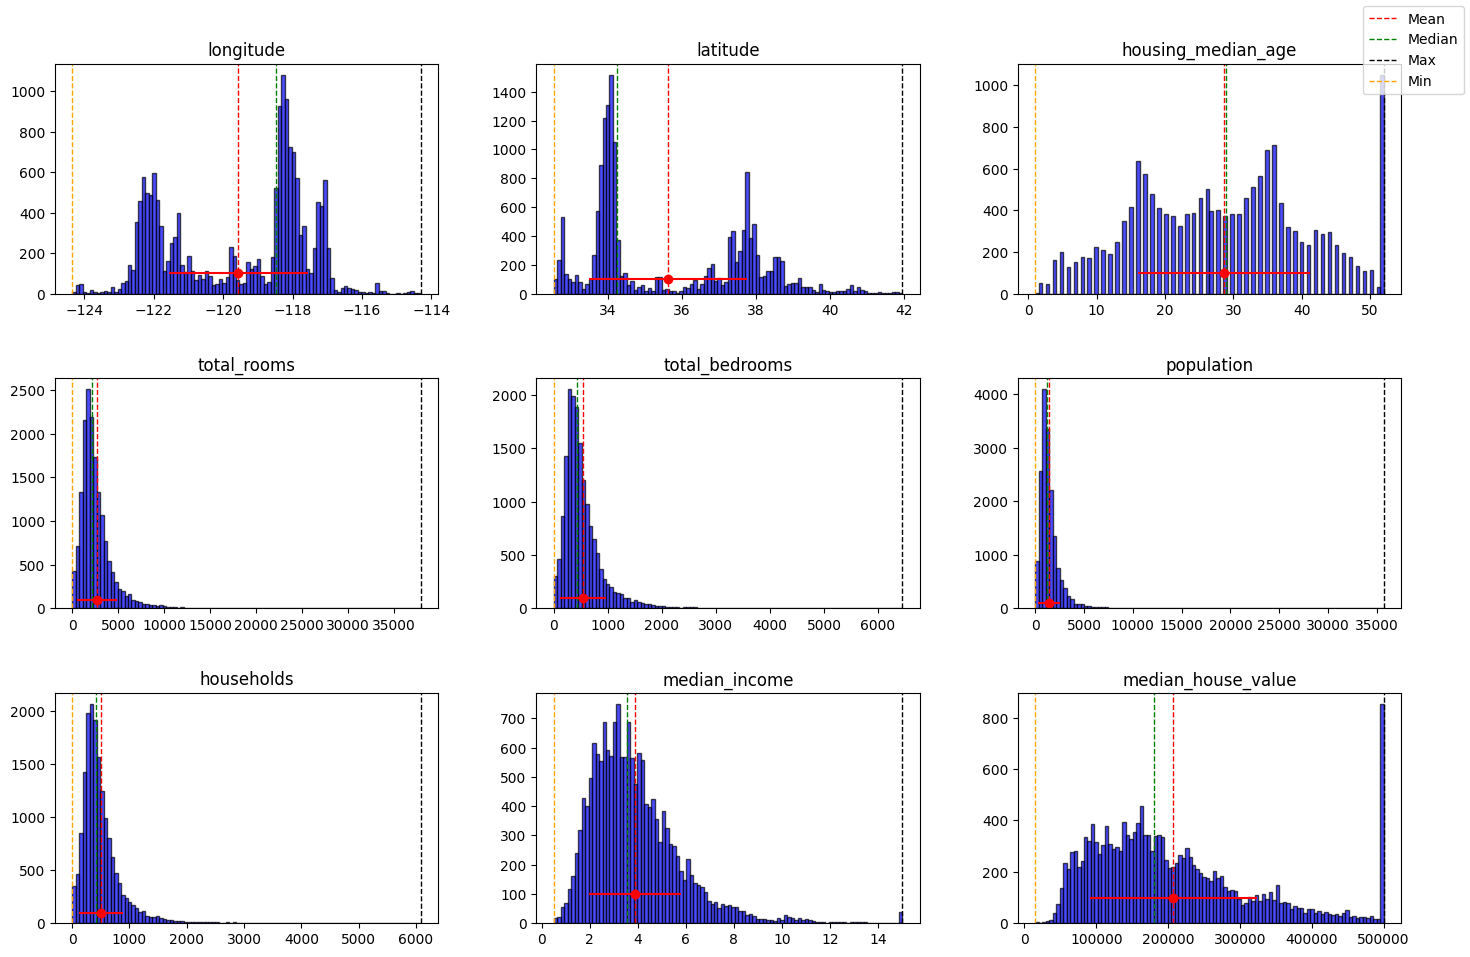

In [ ]:
num_cols = df.shape[1]
num_rows = 3
num_bins = 100

fig, axs = plt.subplots(num_rows, num_cols // num_rows, figsize=(15, 10))
fig.tight_layout(pad=4.0)

for i, col in enumerate(df.columns):
  ax = axs[i // num_rows, i % num_rows]
  ax.hist(df[col], bins=num_bins, alpha=0.7, color='blue', edgecolor='black')

  mean_val = np.mean(df[col])
  median_val = np.median(df[col])
  max_val = np.max(df[col])
  min_val = np.min(df[col])
  std_dev = np.std(df[col])

  ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
  ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label='Median')
  ax.axvline(max_val, color='black', linestyle='dashed', linewidth=1, label='Max')
  ax.axvline(min_val, color='orange', linestyle='dashed', linewidth=1, label='Min')

  ax.errorbar(mean_val, 100, xerr=std_dev, fmt='o', color='red')

  ax.set_title(col)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()

In [ ]:
normalized_df = np.abs((df - df.min())) / np.abs((df.max() - df.min()))
normalized_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.000000  0.175345            0.274510     0.147885        0.198945   
1       0.984064  0.197662            0.352941     0.201608        0.294848   
2       0.975100  0.122210            0.313725     0.018927        0.026847   
3       0.974104  0.116897            0.254902     0.039515        0.052142   
4       0.974104  0.109458            0.372549     0.038276        0.050435   
...          ...       ...                 ...          ...             ...   
16995   0.008964  0.854410            1.000000     0.058389        0.060987   
16996   0.007968  0.866100            0.686275     0.061869        0.081782   
16997   0.004980  0.988310            0.313725     0.070515        0.082247   
16998   0.004980  0.984060            0.352941     0.070384        0.085506   
16999   0.000000  0.850159            1.000000     0.047924        0.046400   

       population  households  median_income  median_house_value  
0        0.028364    0.077454       0.068530            0.107012  
1        0.031559    0.075974       0.091040            0.134228  
2        0.009249    0.019076       0.079378            0.145775  
3        0.014350    0.037000       0.185639            0.120414  
4        0.017405    0.042921       0.098281            0.104125  
...           ...         ...            ...                 ...  
16995    0.025337    0.060516       0.128081            0.198764  
16996    0.033381    0.076303       0.139170            0.131960  
16997    0.034782    0.074823       0.174577            0.182682  
16998    0.036296    0.078441       0.102054            0.145981  
16999    0.022506    0.044236       0.173432            0.164125  

[17000 rows x 9 columns]

In [ ]:
def laplace_mechanism(true_value, epsilon, sensitivity, num_samples):
  b = sensitivity / epsilon

  laplace_noise = np.random.laplace(scale=b, size=num_samples)

  return true_value + laplace_noise

def sensitivity(func, n):
  if func == 'Mean':
      return 1 / n
  elif func == 'Std':
      return 1 / np.sqrt(n)
  elif func == 'Max' or func == 'Min' or func == 'Median':
      return 1

def compute_accuracy(column_data, func, func_name, epsilon, num_points, num_samples):
  true_value = func(column_data)
  sens = sensitivity(func_name, num_points)
  samples = laplace_mechanism(true_value, epsilon, sens, num_samples)
  return np.abs(samples - true_value).mean()

functions = {
    'Mean': lambda x: np.mean(x),
    'Median': lambda x: np.median(x),
    'Max': lambda x: np.max(x),
    'Min': lambda x: np.min(x),
    'Std': lambda x: np.std(x)
}

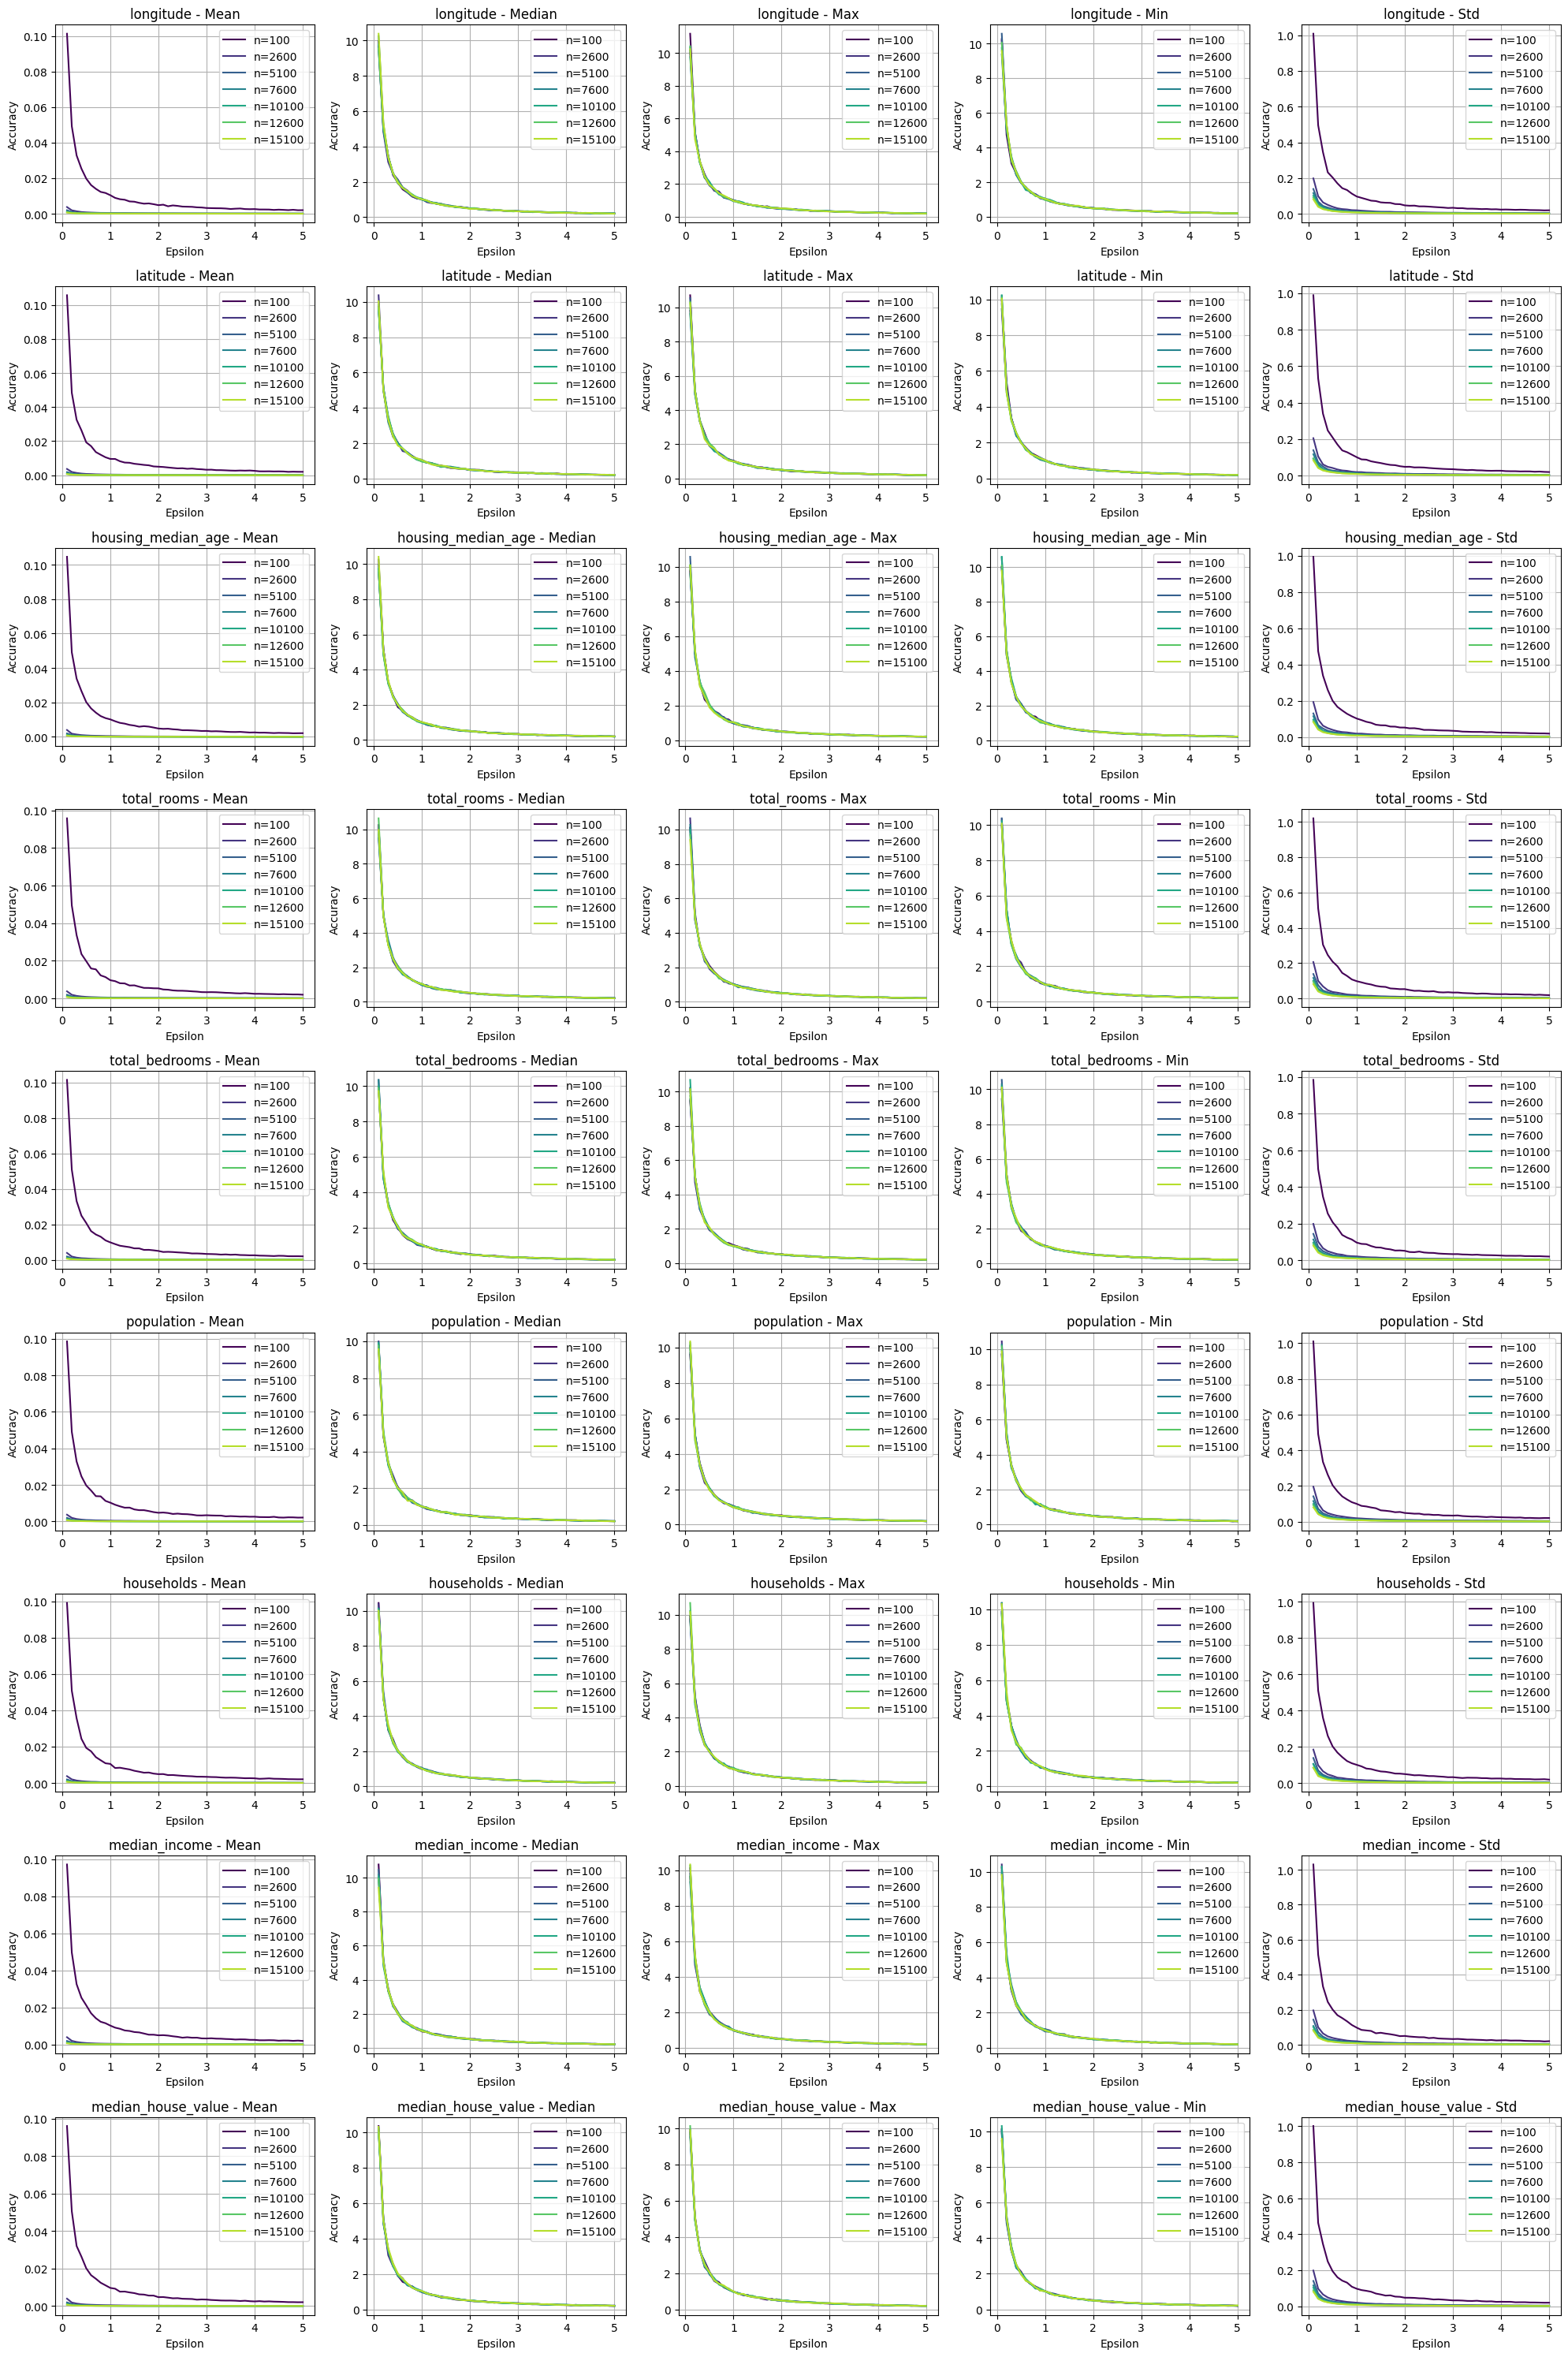

In [ ]:
columns = normalized_df.columns
epsilons = np.arange(0.1, 5.1, 0.1)
num_points_range = np.arange(100, len(normalized_df), 2500)
num_samples = 1000

plt.figure(figsize=(20, 30))

plot_index = 1
for col in columns:
    column_data = normalized_df[col]
    for (func_name, func) in functions.items():
        plt.subplot(len(columns), len(functions), plot_index)
        plt.title(f"{col} - {func_name}")
        for num_points in num_points_range:
            prefix_col_data = column_data[:num_points]
            errors = [compute_accuracy(prefix_col_data, func, func_name, epsilon, num_points, num_samples) for epsilon in epsilons]
            plt.plot(epsilons, errors, label=f'n={num_points}', color=plt.cm.viridis(num_points / len(normalized_df)))
        plt.xlabel('Epsilon')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plot_index += 1

plt.tight_layout()
plt.show()

The results show that at $ϵ$ = 0.01 (near perfect privacy), error is generally much higher and slowly decreases as $ϵ$ increases. This is not unexpected since differential privacy should lower the accuracy of a model. This difference is much less pronounced on some functions compared to others.

Some columns varied extremely wildly from the general idea that lower samples had higher error on average. The largest differences come with two categories: Mean/Std vs. Median/Max/Min. The error is much smaller with Mean/Std than with Median/Max/Min. This is likely because of the sensitivity calculation where Mean/Std are smaller at $\frac{1}{n}$ and $\frac{1}{\sqrt{n}}$ while Median/Max/Min are 1. Therefore, it is reasonable to conclude that Mean/Std are in the sweet spot for differential privacy.

In [ ]:
normalized_100_df = normalized_df * 100
normalized_100_df

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0      100.000000  17.534538           27.450980    14.788454       19.894475   
1       98.406375  19.766206           35.294118    20.160801       29.484792   
2       97.509960  12.221041           31.372549     1.892711        2.684668   
3       97.410359  11.689692           25.490196     3.951496        5.214153   
4       97.410359  10.945802           37.254902     3.827600        5.043451   
...           ...        ...                 ...          ...             ...   
16995    0.896414  85.441020          100.000000     5.838935        6.098696   
16996    0.796813  86.609989           68.627451     6.186899        8.178150   
16997    0.498008  98.831031           31.372549     7.051536        8.224705   
16998    0.498008  98.405951           35.294118     7.038355        8.550590   
16999    0.000000  85.015940          100.000000     4.792408        4.639975   

       population  households  median_income  median_house_value  
0        2.836402    7.745437       6.853009           10.701193  
1        3.155918    7.597435       9.104012           13.422831  
2        0.924914    1.907581       7.937822           14.577466  
3        1.435018    3.700049      18.563882           12.041394  
4        1.740520    4.292057       9.828140           10.412534  
...           ...         ...            ...                 ...  
16995    2.533703    6.051636      12.808099           19.876413  
16996    3.338098    7.630324      13.917049           13.196028  
16997    3.478236    7.482322      17.457690           18.268172  
16998    3.629586    7.844105      10.205376           14.598084  
16999    2.250624    4.423615      17.343209           16.412510  

[17000 rows x 9 columns]

In [ ]:
def MIA(f, x, x_prime, y):
  x_result = f(x)
  x_prime_result = f(x_prime)
  if np.sum(abs(y - x_result)) <= np.sum(abs(y - x_prime_result)):
    return 0
  return 1

def check_correct(column_data, func, func_name, epsilon, num_points, num_samples):
  random_index = np.random.randint(len(column_data))
  x_prime = np.delete(column_data, random_index)

  rng = np.random.default_rng()
  choice = -1

  if rng.random() > 0.5:
    true_value = func(column_data)
    choice = 0
  else:
    true_value = func(x_prime)
    choice = 1

  sens = sensitivity(func_name, num_points)
  samples = laplace_mechanism(true_value, epsilon, sens, num_samples)
  return MIA(func, column_data, x_prime, samples) == choice

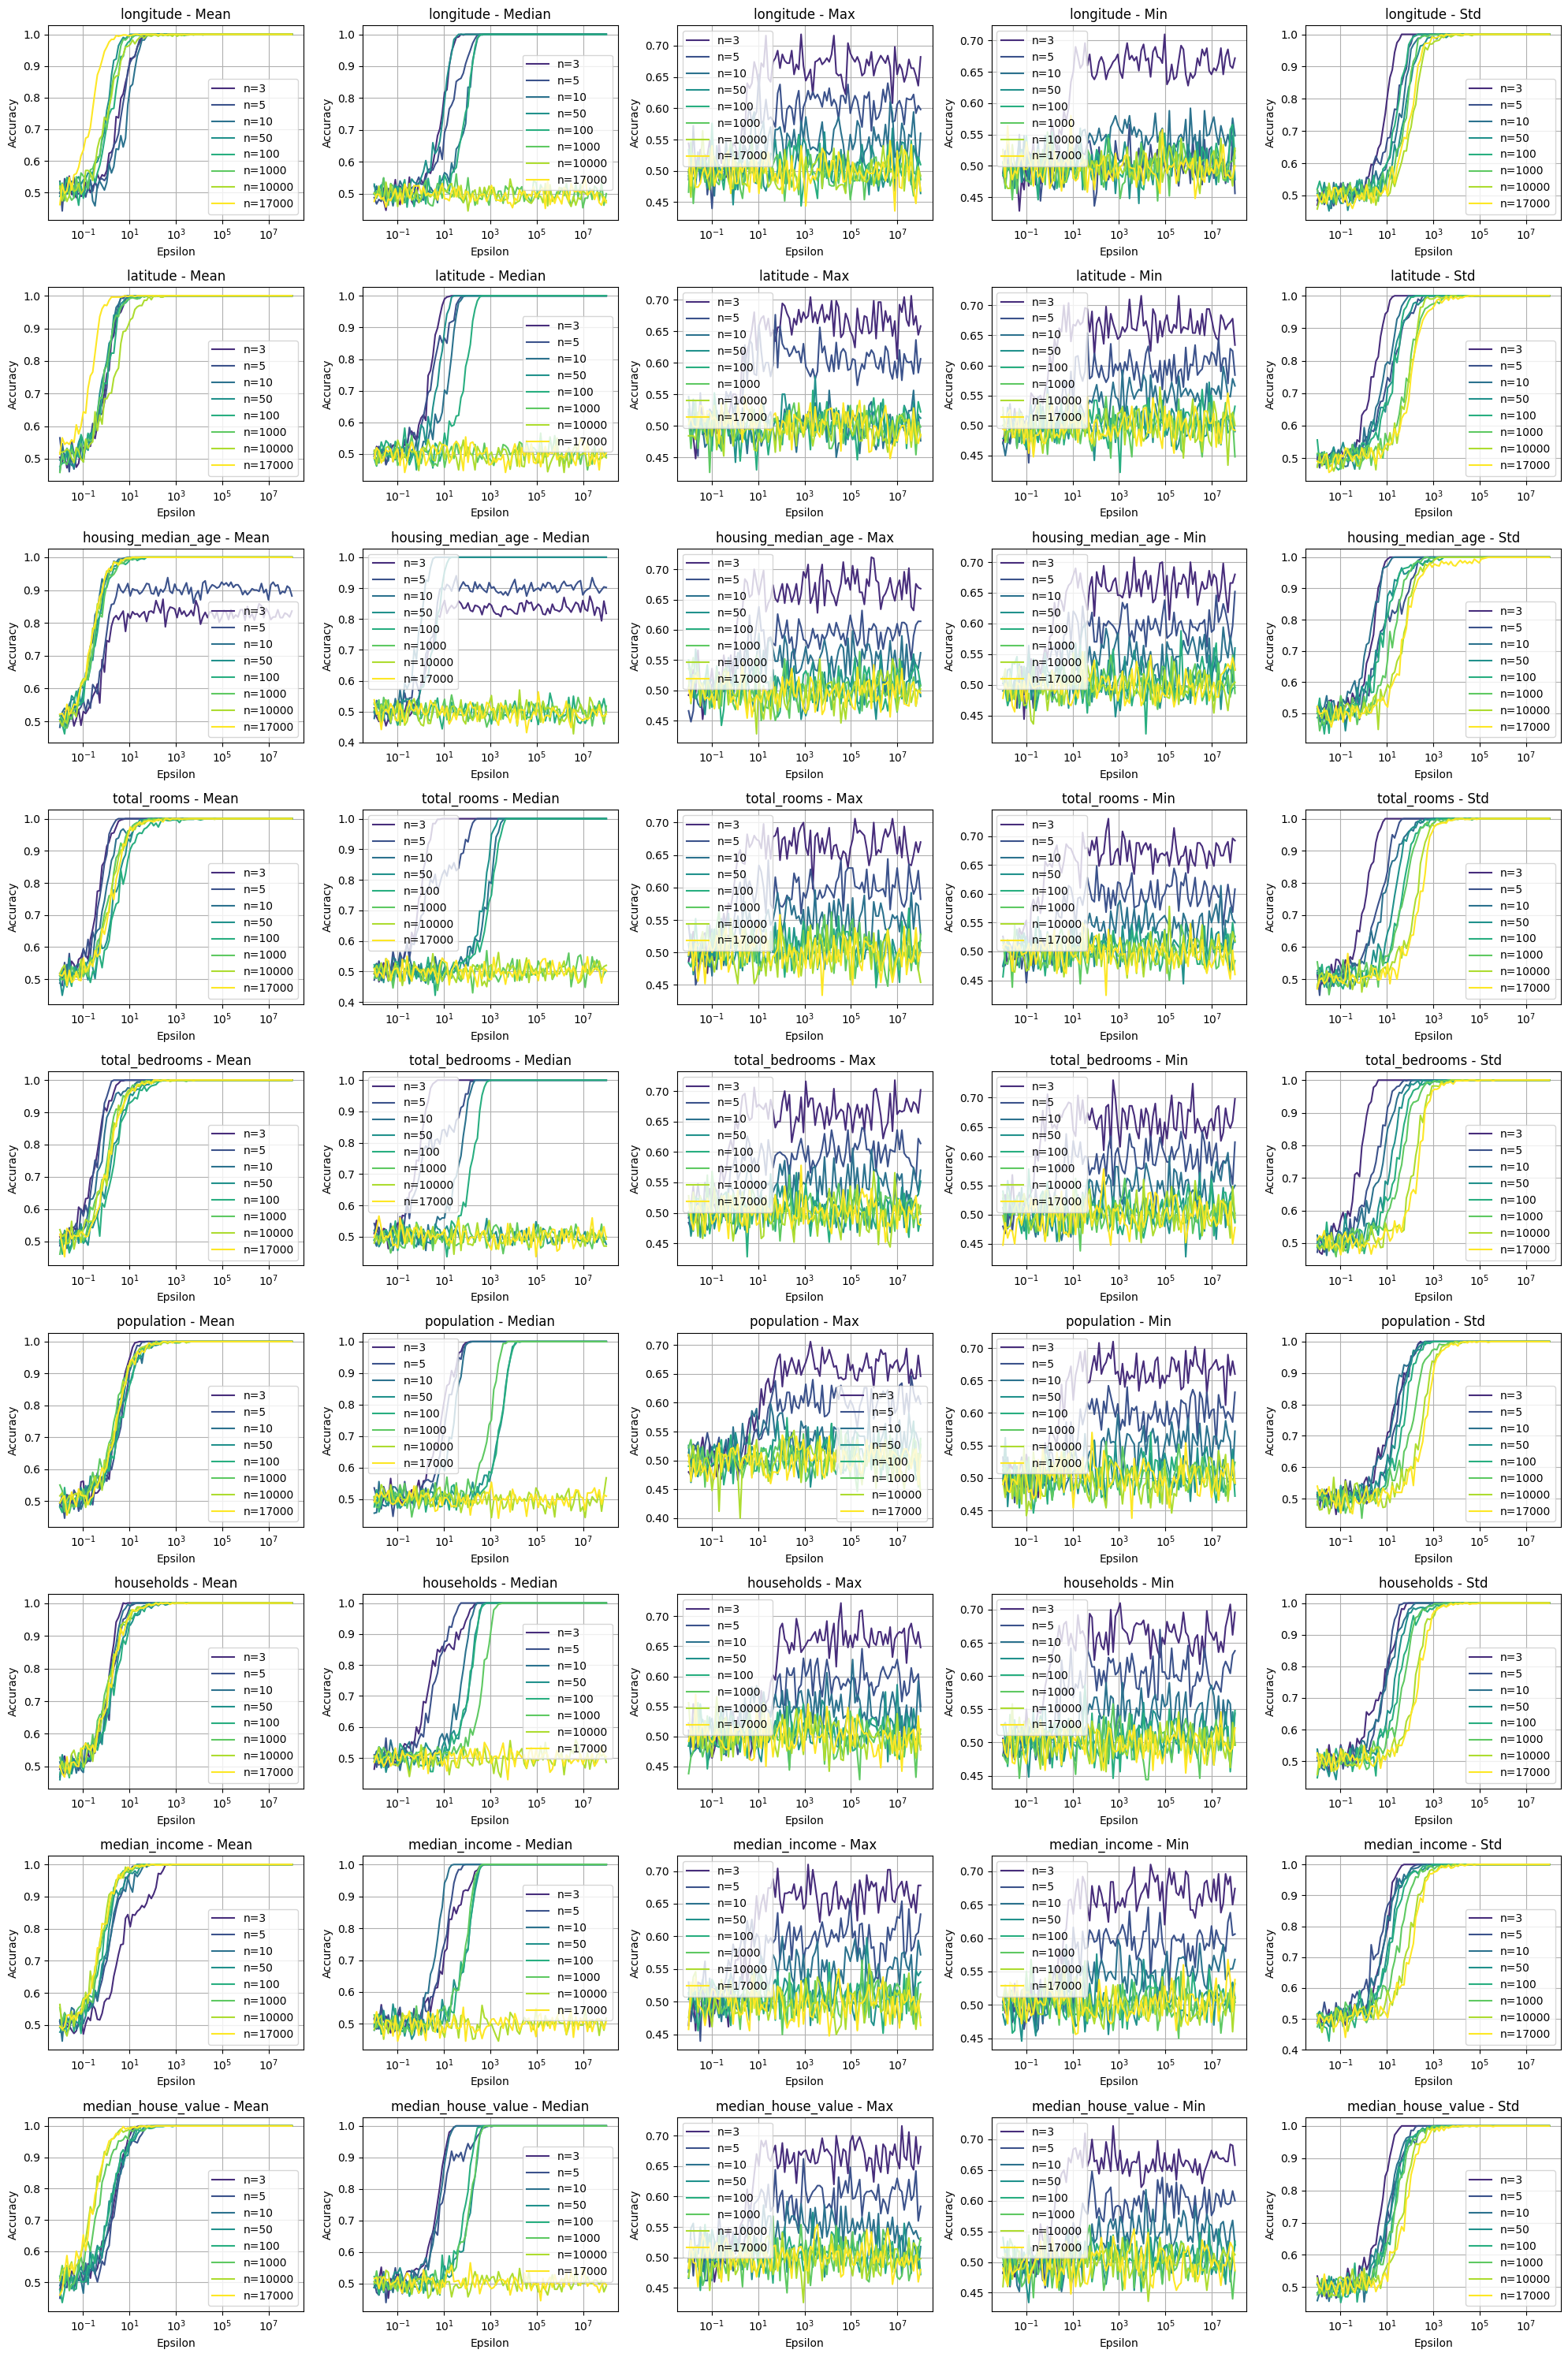

In [ ]:
epsilons = np.geomspace(1e-2, 1e8, 100)
colors = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 0.999]

num_points_range = [3, 5, 10, 50, 100, 1000, 10000, 17000]
num_samples = 1000

fig, axes = plt.subplots(len(columns), len(functions), figsize=(20, 30))

for i, col in enumerate(columns):
    column_data = normalized_df[col]
    for j, (func_name, func) in enumerate(functions.items()):
        ax = axes[i, j]
        ax.set_title(f"{col} - {func_name}")
        ax.set_xscale("log")
        for k, num_points in enumerate(num_points_range):
            prefix_col_data = column_data[:num_points]
            error = []
            for epsilon in epsilons:
              results = [check_correct(prefix_col_data, func, func_name, epsilon, num_points, num_samples) for _ in range(500)]
              error.append(np.mean(results))
            ax.plot(epsilons, error, label=f'n={num_points}', color=plt.cm.viridis(colors[k]))
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

Generally off the plots, it seems like as epsilon increases (very low DP), it becomes easier to guess which dataset $y$ was taken from. This is intuitive because the data is basically untouched.
MIA success rate generally decreases with larger prefixes where the "blue-r" colors (lower prefix sizes) reach perfect accuracy with a lower epsilon value, but there are some exceptions such as max/min where the blue colors separated from pure luck (50%), but could not hit 100% as well as some plots in mean.

Earlier, I concluded that Mean/Std were at the sweet spot for DP and it seems to hold since those graphs clearly go from 0.5 to 1 with higher epsilon regardless of prefix length while Median/Max/Min show poor MIA performance especially at higher prefix lengths.